# Pymaceuticals Inc.
---

### Analysis
    A study of 249 mice, who were identified with Squamas Cell Carcinoma (SCC), was conducted. The mice tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. The data was accumulated, cleaned, and results analyzed.
    First duplicate data was removed to prevent skewing of the results. Only one mouse was identified to have duplicate invalid data. After identifying the duplicate data a new data frame was created without the mouse. 
    Two treatments were identified with a significant lower tumor volume than others. Those two treatments were Ramicane, and the treatment of interest, Capomulin. Each of the medications average tumor volume was approximately 40 cc with Ramicane edging out Capomulin by 0.4 cc. 
    The sex of the mouse was taken into consideration in the trial. Of the 249 specimens, it was a near split based on sex of the mouse. The split was 51% male and 49% female. The highest tumor volumes for those mice treated with Capomulin were in female mice. One thing to note is that of the female mice who had a high tumor volume, weight was also elevated. 
    Weight varied among the 249 specimen.  The average weight was compared with the average tumor volume for each of the "Mouse ID's." Upon plotting weight versus tumor volume it was noted the a positive correlation existed between weight and tumor volume. As the weight increased among the mice so did the tumor volume. The correlation was strong at 0.84. This would suggest that Capomulin is less effective in heavier subjects. It is worth mentioning that of the female mice with the largest tumor volumes, the weight was elevated as well.
    Further study and analysis of the data for Capomulin would benefit. It would specifically be beneficial to focus on the timepoint of Capomulin. In one of the parts in the anaylysis, the timepoint was compared to tumor volume for one of the ID's. Over the 45 day trial it did show a significant decrease in tumor size after 40 days. Extending the trial would most likely benefit the study in seeing if the medication fully eradicates the tumors. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_data_df=pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
combined_study_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_number=len(combined_study_data_df["Mouse ID"].value_counts())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas

duplicate_data=combined_study_data_df[combined_study_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_data["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean_df=combined_study_data_df.loc[combined_study_data_df["Mouse ID"]!="g989"]
combined_clean_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(combined_clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumorvolume=combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumorvolume=combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumorvolume=combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumorvolume=combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_tumorvolume=combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({
    "Mean Tumor Volume":mean_tumorvolume,
    'Median Tumor Volume':median_tumorvolume,
    "Tumor Volume Variance":variance_tumorvolume,
    "Tumor Volume Std. Dev.":std_tumorvolume,
    "Tumor Volume Std. Err.":SEM_tumorvolume})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/

summary_df_2=combined_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean','median','var', 'std', 'sem']})
summary_df_2



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

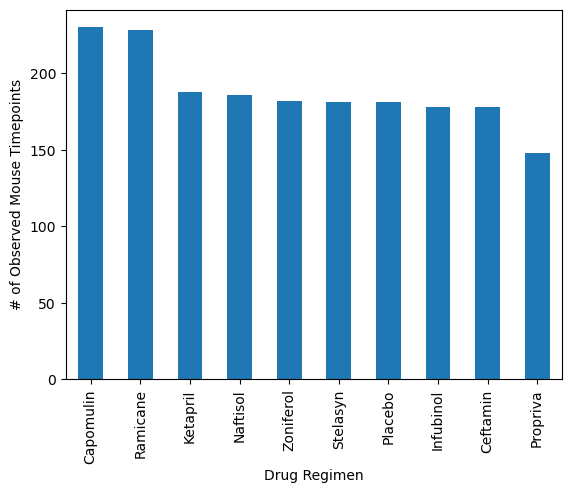

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count=combined_clean_df["Drug Regimen"].value_counts()
regimen_count.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")
#plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

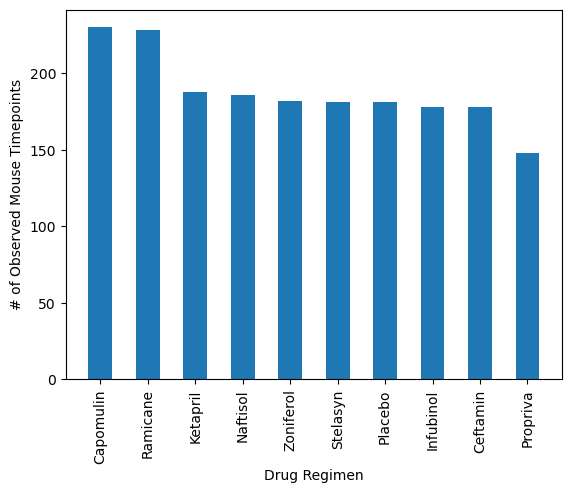

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=regimen_count.index, height=regimen_count.values, width=0.5)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

#Rotate x-ticks to make more readable
plt.xticks(rotation=90)

plt.show()

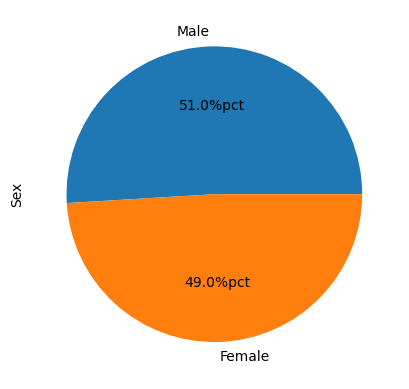

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
gender_count=combined_clean_df["Sex"].value_counts()
gender_count.plot(kind="pie", ylabel="Sex", autopct='%.1f%%pct')
plt.show()

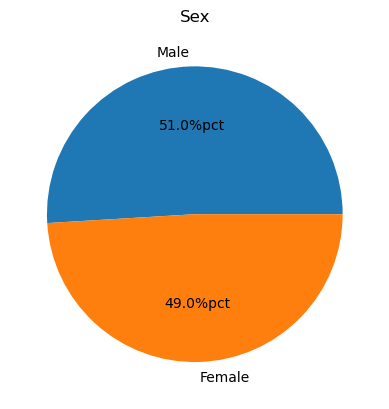

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=gender_count, labels=["Male", "Female"], autopct="%1.1f%%pct")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=combined_clean_df.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint_df=greatest_timepoint.reset_index()
greatest_timepoint_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_maxtimepoint_df=pd.merge(greatest_timepoint_df, combined_clean_df, how="left", on= ["Mouse ID", "Timepoint"])
clean_maxtimepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

for med in treatment:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume=clean_maxtimepoint_df.loc[clean_maxtimepoint_df["Drug Regimen"]==med, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volume)
                                           
     # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles=tumor_volume.quantile([0.25, 0.5, 0.75])
    Q1=quartiles[0.25]
    Q3=quartiles[0.75]
    IQR=Q3-Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound= Q1-(1.5*IQR)
    upper_bound= Q3+(1.5*IQR)
    no_outliers = tumor_volume.loc[(lower_bound < tumor_volume) &  (tumor_volume < upper_bound)]
    outliers = tumor_volume.loc[(lower_bound >= tumor_volume) |  (tumor_volume >= upper_bound)]
    
    print(f"{med}'s tumor outliers: {outliers}")


Capomulin's tumor outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's tumor outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's tumor outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's tumor outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


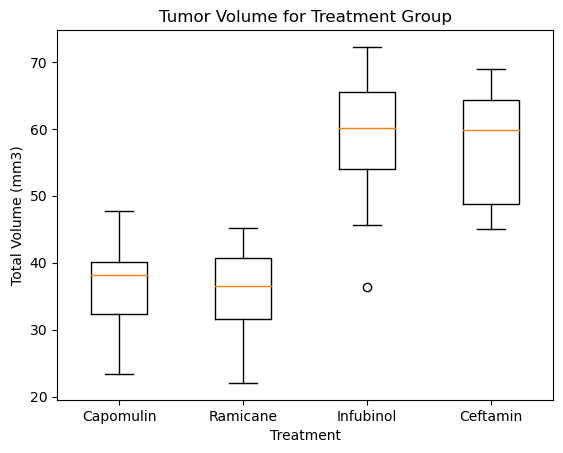

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#https://stackoverflow.com/questions/47201842/xlabel-ylabel-not-working-str-object-is-not-callable

plt.boxplot(tumor_vol_data, labels=treatment, showfliers=True)
plt.xlabel("Treatment")
plt.ylabel("Total Volume (mm3)")
plt.title("Tumor Volume for Treatment Group")
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Define the variables
treatment="Capomulin"
mouse_id="u364"

#Filter data for mouse ID and treatment
filtered_mouse=combined_clean_df.loc[(combined_clean_df["Mouse ID"]==mouse_id)]
filtered_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1745,u364,0,45.000000,0,Capomulin,Male,18,17
1746,u364,5,45.760886,1,Capomulin,Male,18,17
1747,u364,10,46.568417,2,Capomulin,Male,18,17
1748,u364,15,47.212200,2,Capomulin,Male,18,17
1749,u364,20,40.343948,2,Capomulin,Male,18,17
1750,u364,25,35.503616,2,Capomulin,Male,18,17
1751,u364,30,35.978334,2,Capomulin,Male,18,17
1752,u364,35,35.459490,2,Capomulin,Male,18,17
1753,u364,40,36.024138,2,Capomulin,Male,18,17
1754,u364,45,31.023923,3,Capomulin,Male,18,17


In [17]:
filtered_mouse_med=filtered_mouse.loc[(filtered_mouse["Drug Regimen"]==treatment)]
filtered_mouse_med

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1745,u364,0,45.000000,0,Capomulin,Male,18,17
1746,u364,5,45.760886,1,Capomulin,Male,18,17
1747,u364,10,46.568417,2,Capomulin,Male,18,17
1748,u364,15,47.212200,2,Capomulin,Male,18,17
1749,u364,20,40.343948,2,Capomulin,Male,18,17
1750,u364,25,35.503616,2,Capomulin,Male,18,17
1751,u364,30,35.978334,2,Capomulin,Male,18,17
1752,u364,35,35.459490,2,Capomulin,Male,18,17
1753,u364,40,36.024138,2,Capomulin,Male,18,17
1754,u364,45,31.023923,3,Capomulin,Male,18,17


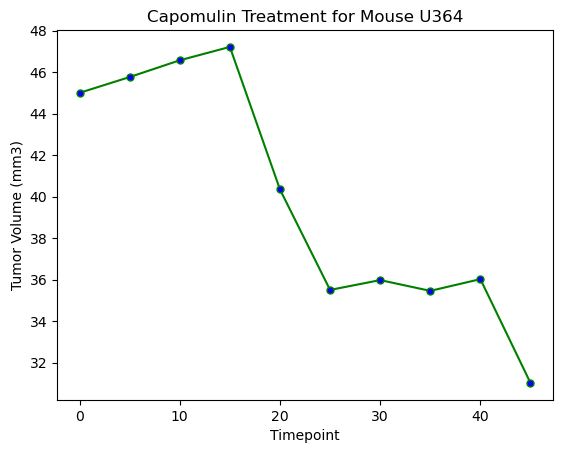

In [36]:
#Extract tumor volume and timepoint for individual mouse ID
tumor_vol_indv=filtered_mouse_med["Tumor Volume (mm3)"]
timepoint_indv=filtered_mouse_med["Timepoint"]

#Design line plot
#https://www.geeksforgeeks.org/line-plot-styles-in-matplotlib/

plt.plot(timepoint_indv, tumor_vol_indv, color = 'green', marker = 'o', markerfacecolor = 'blue', markersize = 5)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse U364")

plt.show()

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
treatment="Capomulin"

#Group by Drug Regimen

grouped_med=combined_clean_df.groupby("Drug Regimen")

#Filter for Capomulin
filtered_med=combined_clean_df.loc[(combined_clean_df["Drug Regimen"]==treatment)]
filtered_med


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


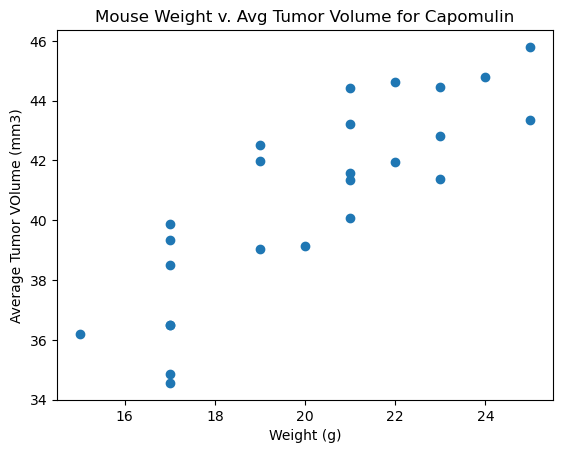

In [20]:
#Find mouse weight and average tumor volume
mouse_weight=filtered_med.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol=filtered_med.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Make scatter plot
x_values=mouse_weight
y_values=avg_tumor_vol
plt.scatter(x_values, y_values)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor VOlume (mm3)")
plt.title("Mouse Weight v. Avg Tumor Volume for Capomulin")

plt.show()

## Correlation and Regression

Pearson Correlation Coefficient:  0.8419363424694719 and a P-value of: 1.3225722434712586e-07


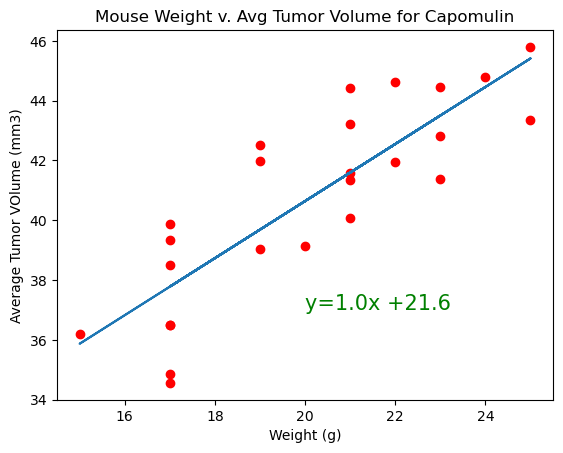

The correlation between mouse weight and average tumor volume is: (0.8419363424694719, 1.3225722434712586e-07)


In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight=filtered_med.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol=filtered_med.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Make scatter plot
x_values=mouse_weight
y_values=avg_tumor_vol
plt.scatter(x_values, y_values, color="red")

# Define the columns to perform Pearsons coefficient test
# https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python

pearson_coef, p_value = st.pearsonr(mouse_weight, avg_tumor_vol)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

# Linear regression model
# https://stackoverflow.com/questions/48370562/how-to-add-regression-line-and-regression-line-equation-on-graph
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)

# Label axis and title
plt.annotate(lin_equation,fontsize=15,color="green", xy=[20,37])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor VOlume (mm3)")
plt.title("Mouse Weight v. Avg Tumor Volume for Capomulin")

plt.show()
print("The correlation between mouse weight and average tumor volume is:", (pearson_coef, p_value))